In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA591/refs/heads/main/data/customer_churn.csv')
df.head()

,CustomerId,Lastname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,15802351,Beers,755,Germany,Female,33,6,90560.30,2,1,1,42607.69,0
1,15591091,Goering,644,France,Male,44,5,73348.56,1,1,0,157166.79,1
2,15769582,Kang,586,France,Male,29,3,0.00,2,1,1,142238.54,0
3,15651823,Nkemjika,590,France,Female,60,6,147751.75,1,1,0,88206.04,1
4,15740175,Raynor,732,Germany,Female,42,2,118889.66,2,0,0,87422.15,0


In [2]:
df.drop(['CustomerId', 'Lastname'], axis=1, inplace=True)

In [4]:
## Imbalanced Problem
## severe: <5%
df['Churned'].value_counts() / len(df)

,count
Churned,
0,0.797654
1,0.202346


In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,755,Germany,Female,33,6,90560.30,2,1,1,42607.69,0
1,644,France,Male,44,5,73348.56,1,1,0,157166.79,1
2,586,France,Male,29,3,0.00,2,1,1,142238.54,0
3,590,France,Female,60,6,147751.75,1,1,0,88206.04,1
4,732,Germany,Female,42,2,118889.66,2,0,0,87422.15,0


In [6]:
!pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 75.3 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)


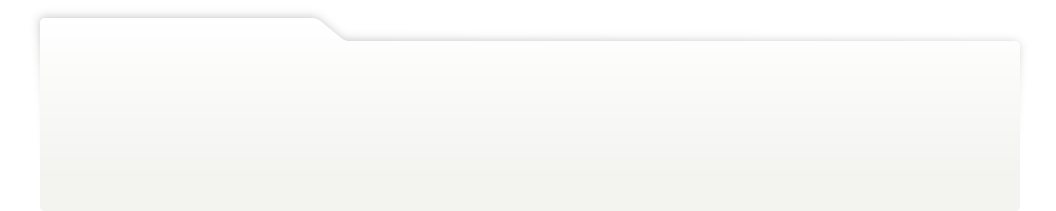
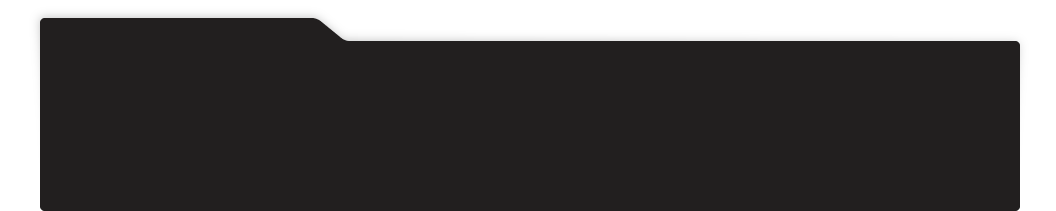
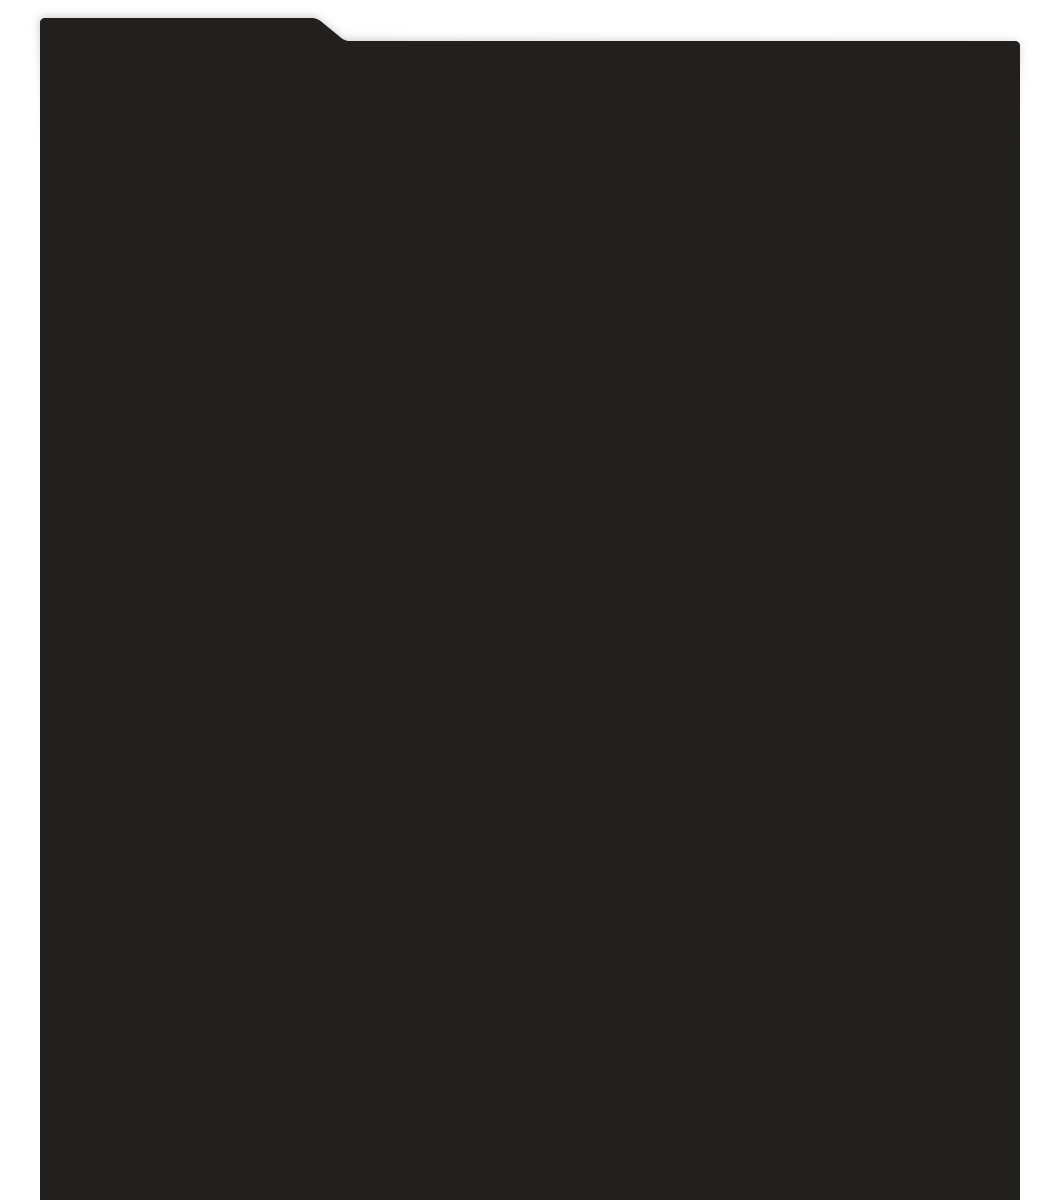
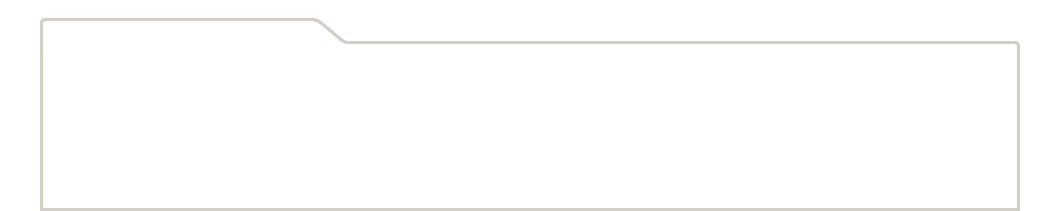
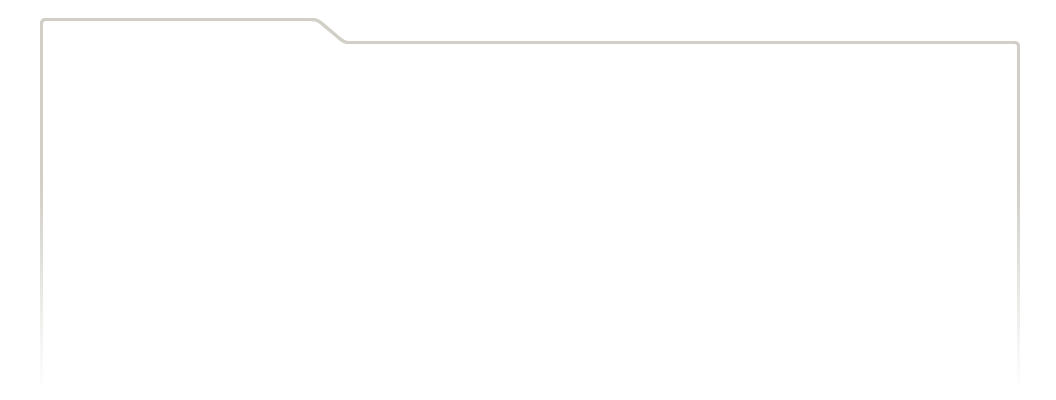
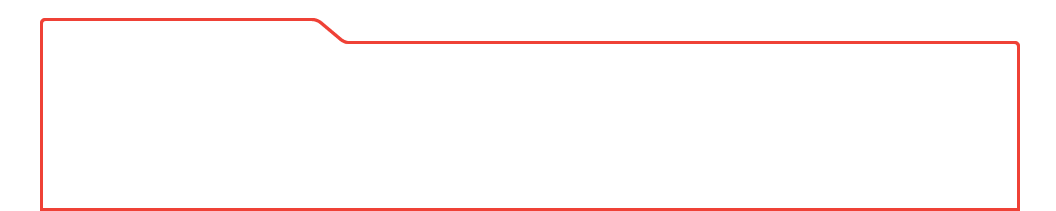
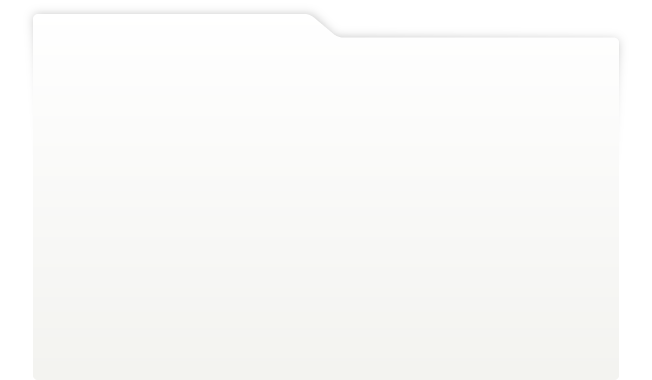
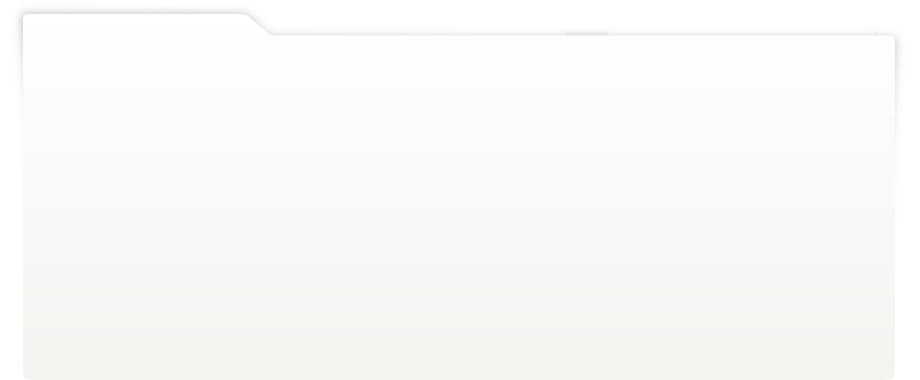
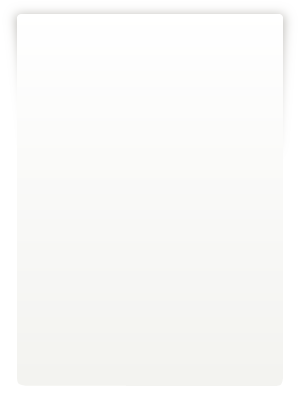
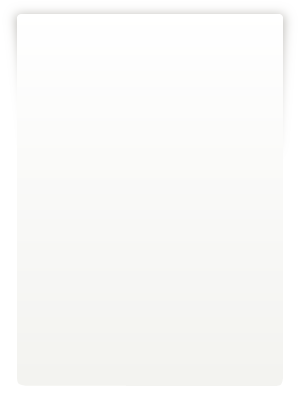
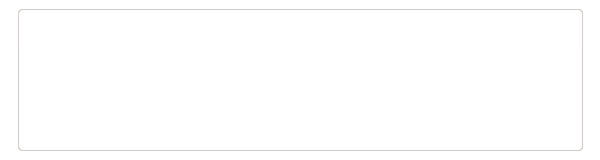
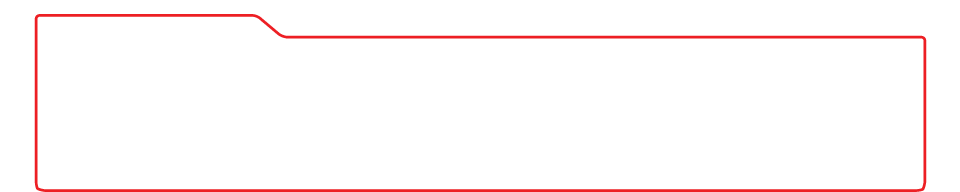
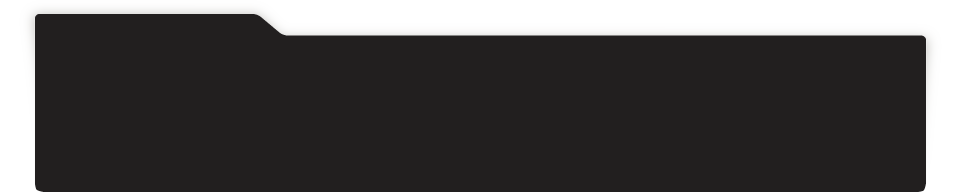
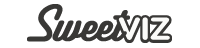
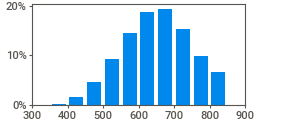
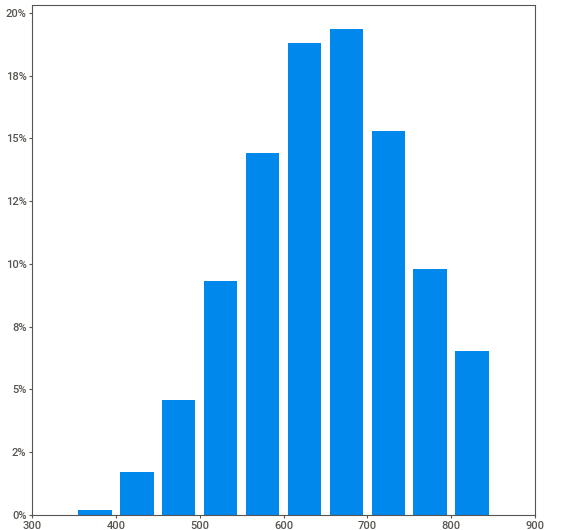
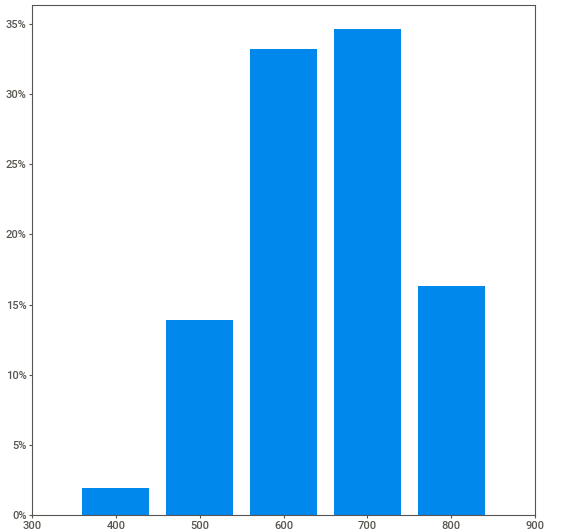
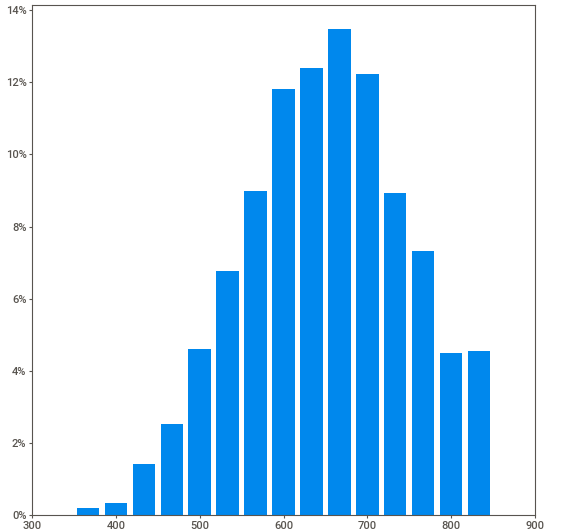
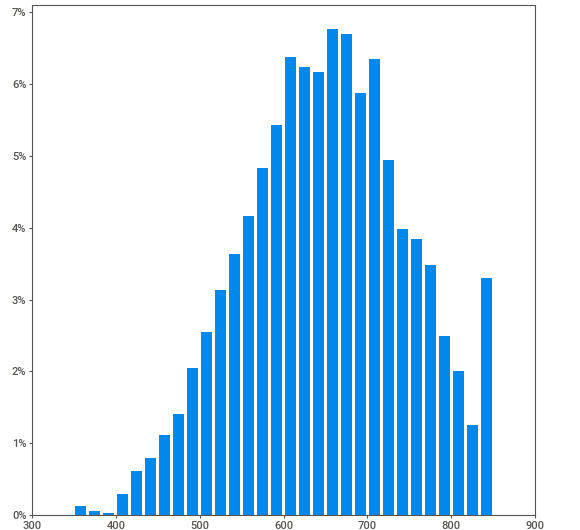
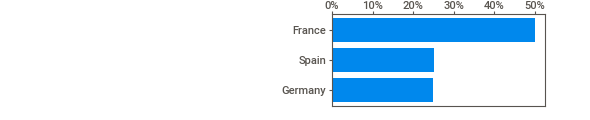
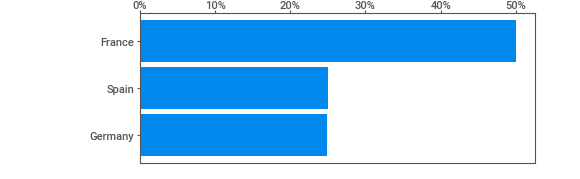
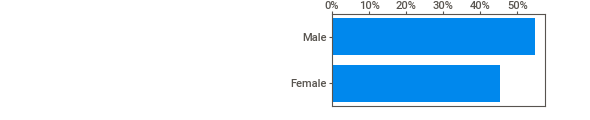
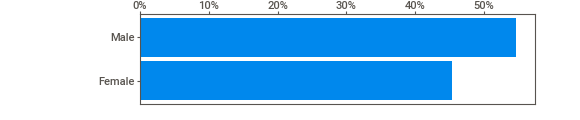
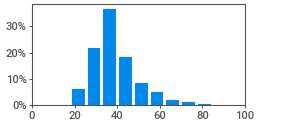
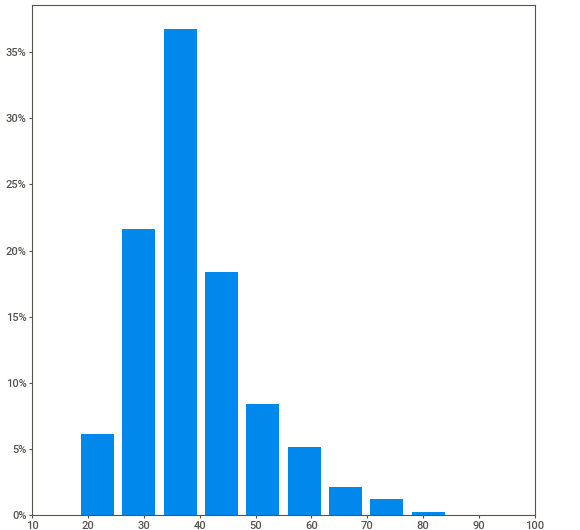
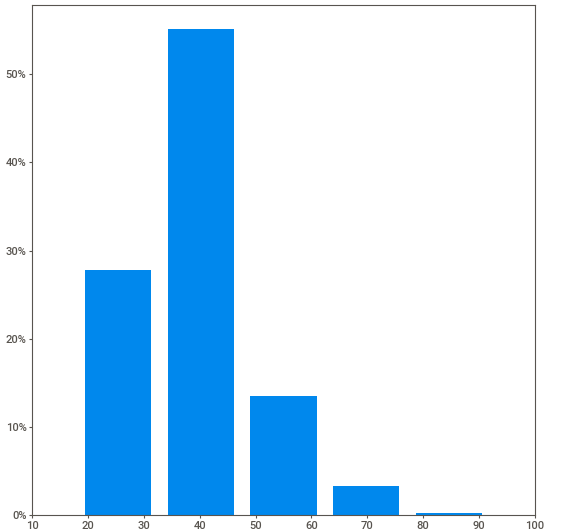
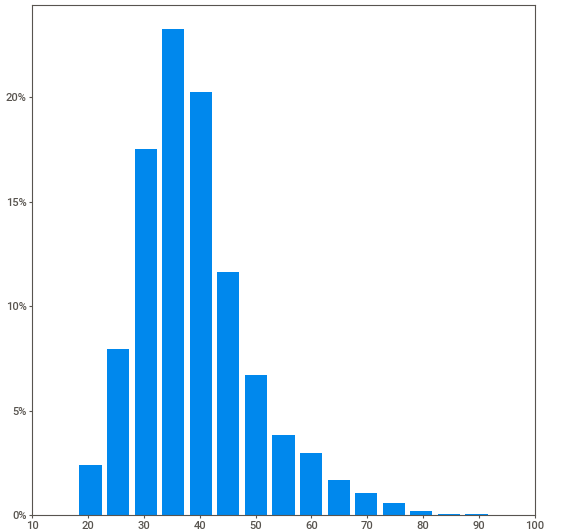
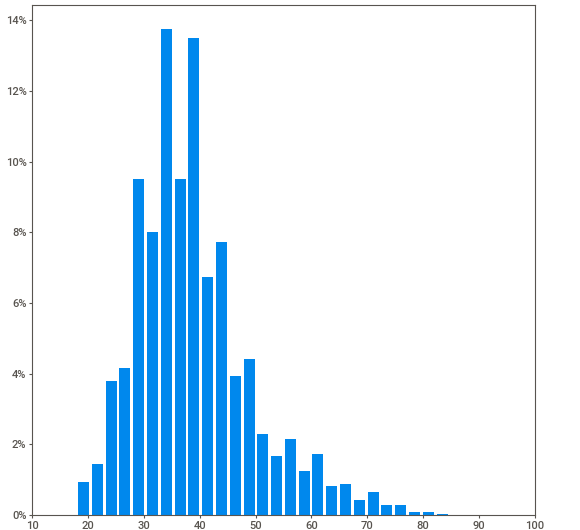
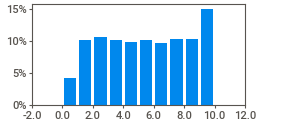
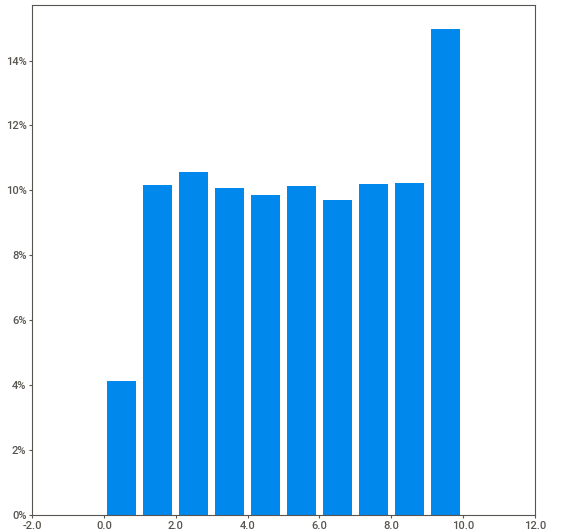
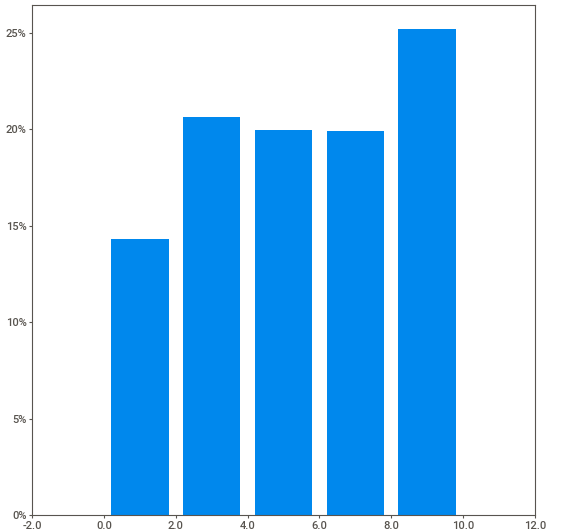
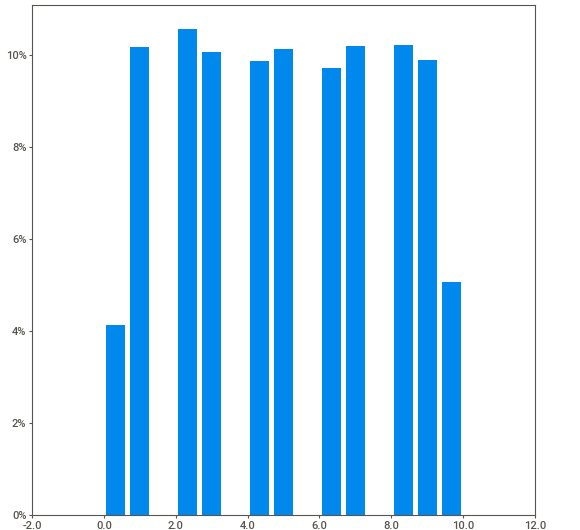
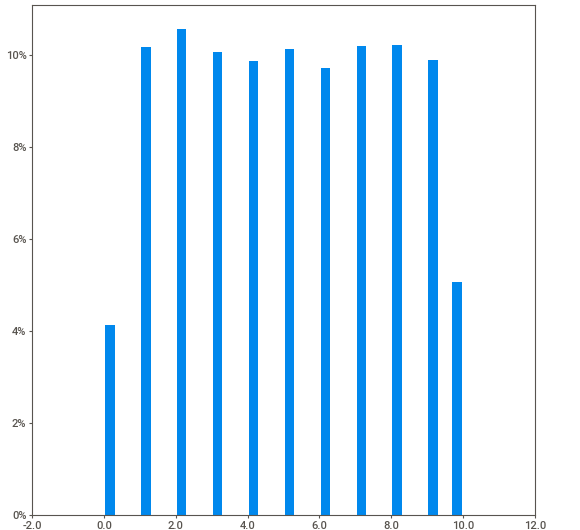
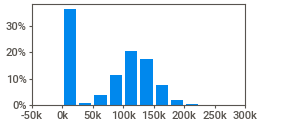
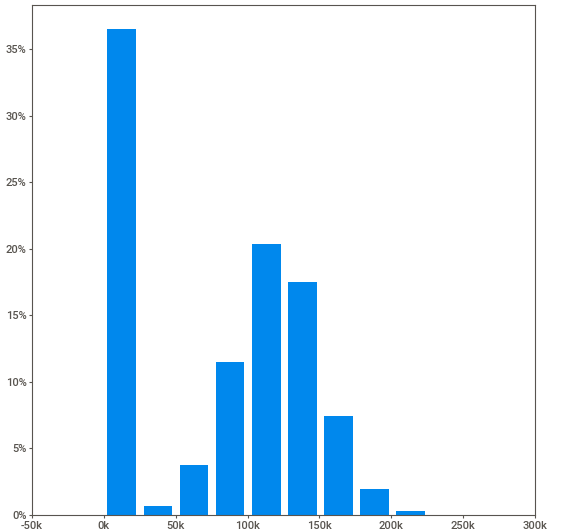
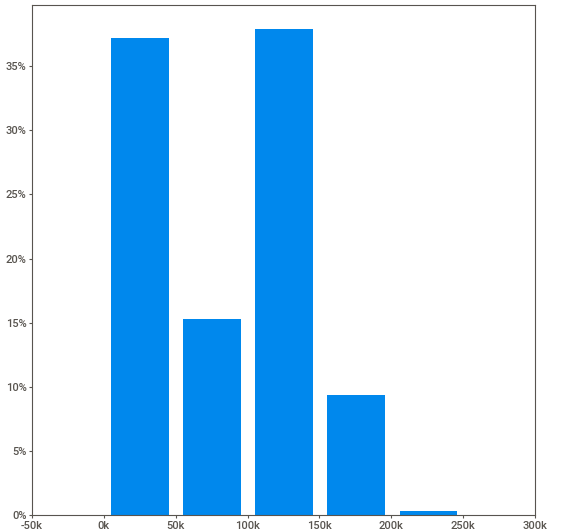
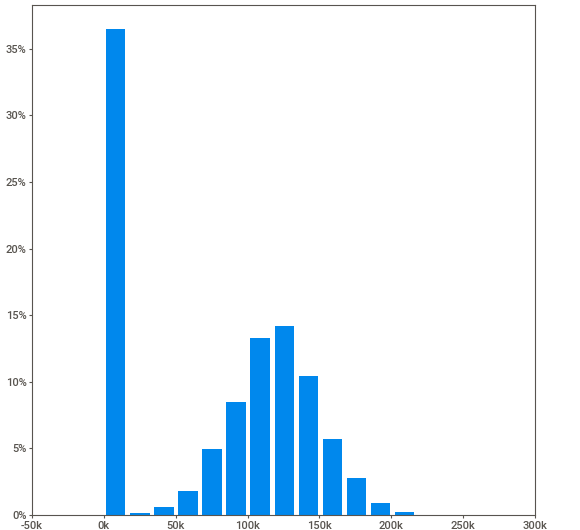
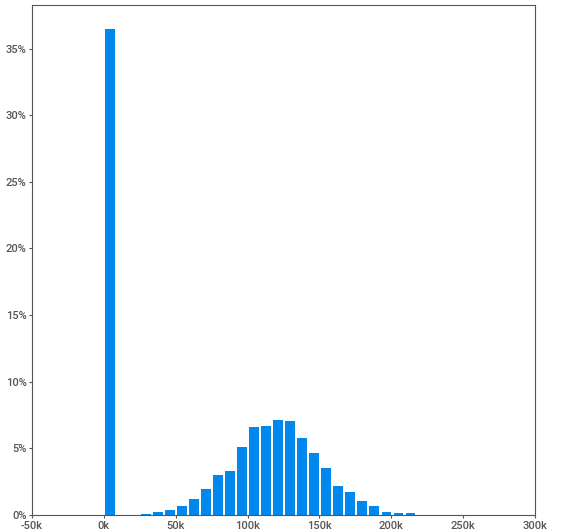
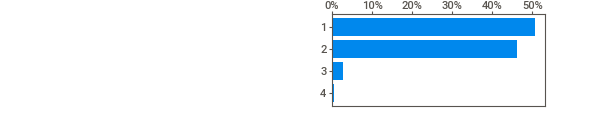
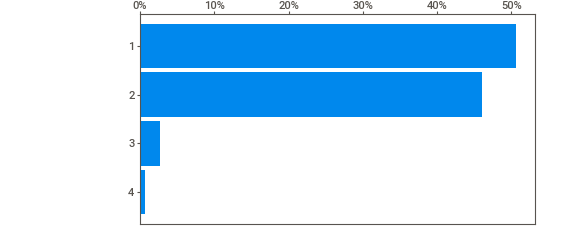
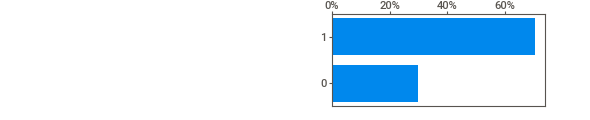
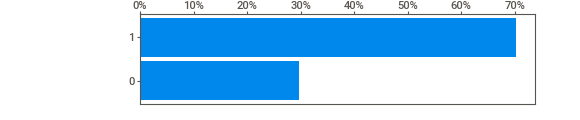
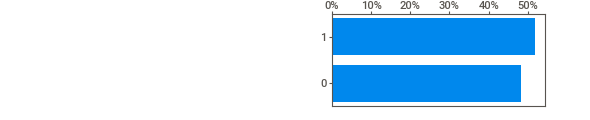
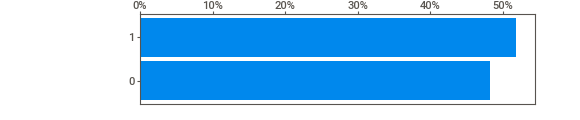
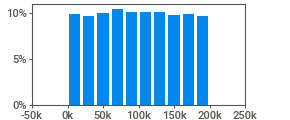
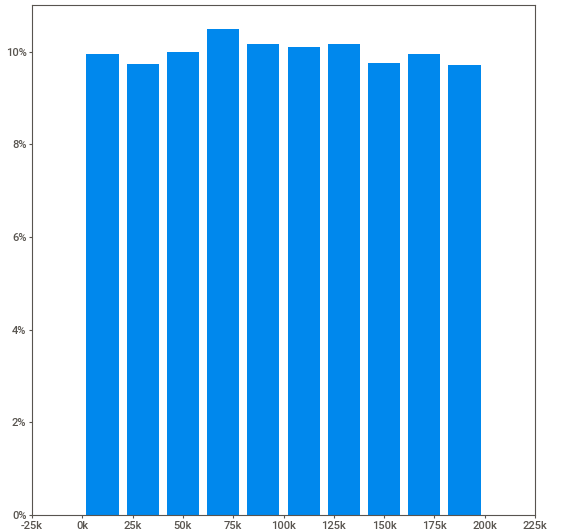
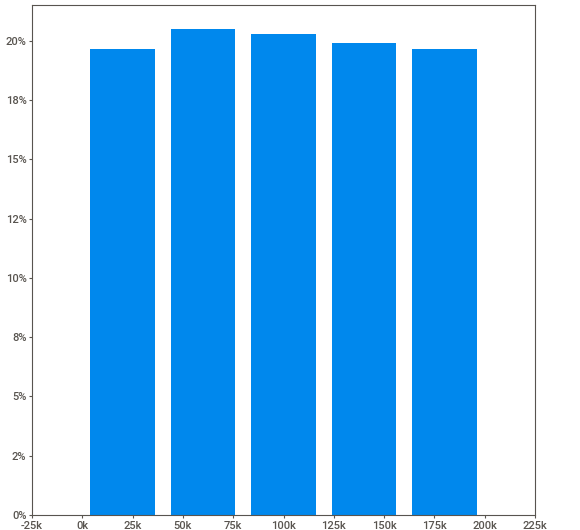
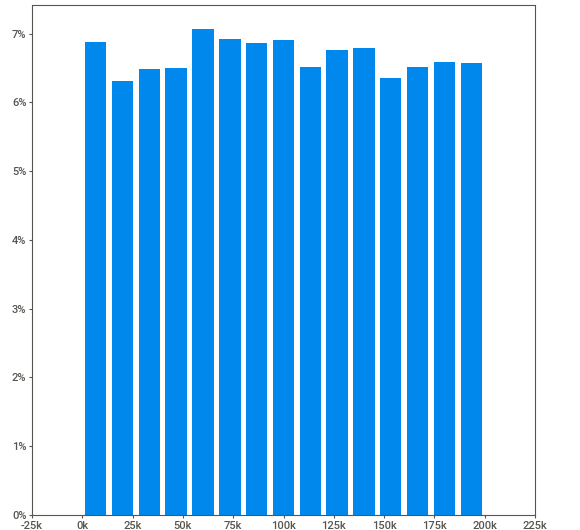
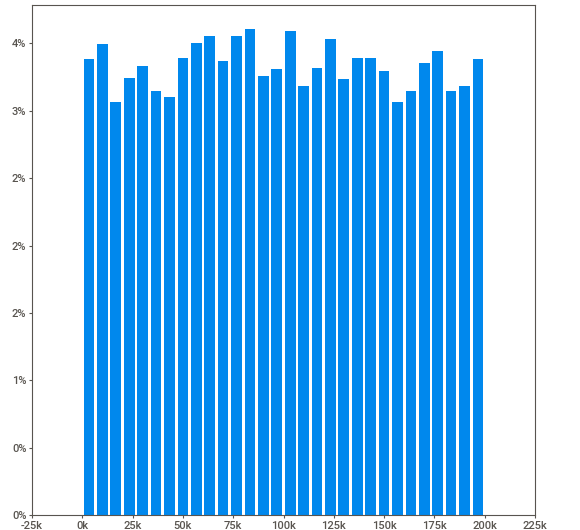
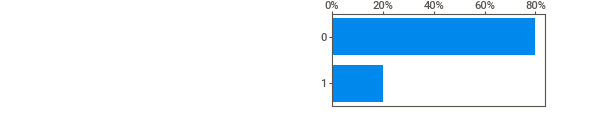
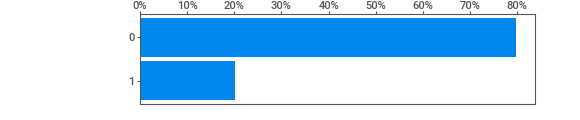
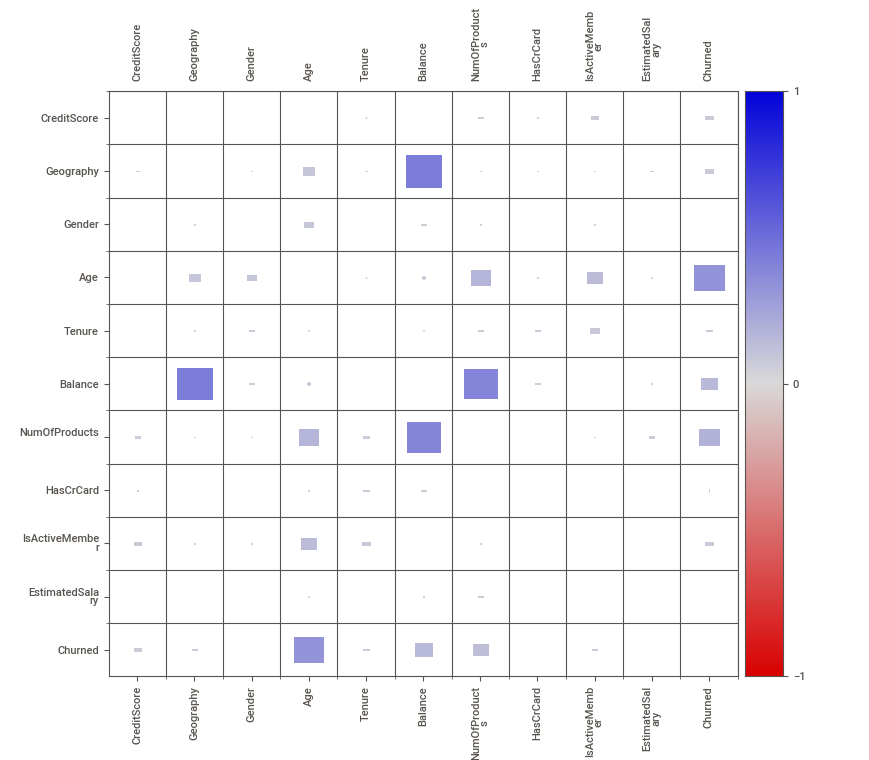
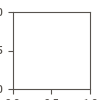

In [7]:
import sweetviz as sv

report = sv.analyze(df)
report.show_notebook()

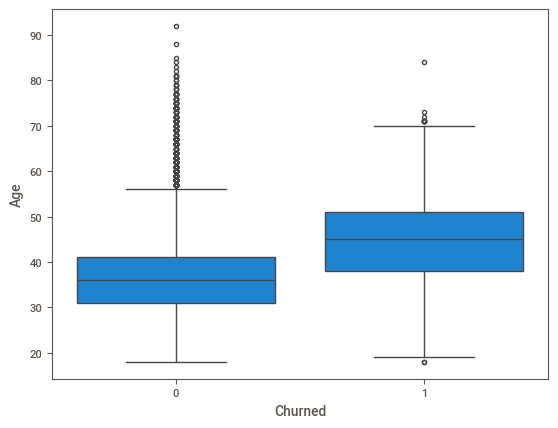

In [8]:
## Age and Balance seem to be the MOST correlated
## correlation is a metric of linear relationship
import seaborn as sns

sns.boxplot(x = "Churned", y = "Age", data = df); ## relationship between binary y and numeric x

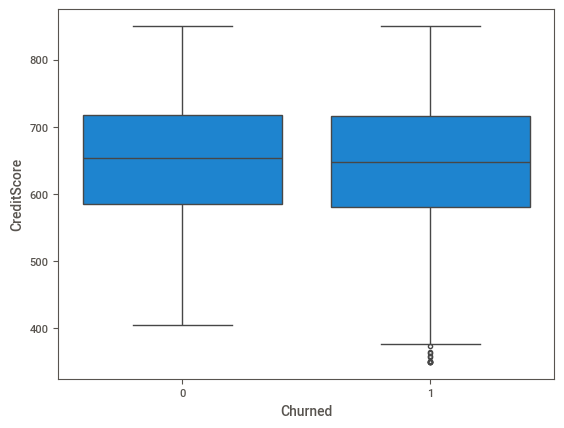

In [9]:
sns.boxplot(x = "Churned", y = "CreditScore", data = df); ## relationship between binary y and numeric x

In [10]:
## encode
df = pd.get_dummies(df, drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Geography_Germany,Geography_Spain,Gender_Male
0,755,33,6,90560.30,2,1,1,42607.69,0,True,False,False
1,644,44,5,73348.56,1,1,0,157166.79,1,False,False,True
2,586,29,3,0.00,2,1,1,142238.54,0,False,False,True
3,590,60,6,147751.75,1,1,0,88206.04,1,False,False,False
4,732,42,2,118889.66,2,0,0,87422.15,0,True,False,False


In [11]:
## X matrix and y vector
X = df.drop('Churned', axis = 1)
y = df['Churned']

In [12]:
## split 80% and 20% random_state = 591
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 591)

In [15]:
y_train.value_counts()

,count
Churned,
0,5186
1,1294


In [16]:
## What to do with imbalance
## UNDERSAMPLING
## keep ALL customers who churned: 1294
## Sample from customers who did not churn: 1294

In [17]:
## imblearn has many functions on over and under sampling
from imblearn.under_sampling import RandomUnderSampler

## instance
rus = RandomUnderSampler(random_state = 591)

## fit_resample ON training data set ONLY
X_train_US, y_train_US = rus.fit_resample(X_train, y_train)

In [18]:
## Now you have an undersampled data set
y_train_US.value_counts()

,count
Churned,
0,1294
1,1294


In [20]:
## fit the model on the UNDERSAMPLED data set
## check performance on the REGULAR test set
## you can create models on the regular training and compare to the UNDERSAMPLED

In [21]:
## 0   ---  25000
## 1   ---  13
## In cases so extreme, OVERSAMPLING
## 0   ---  25000
## 1   ---  25000 (minor changes in the variables)

In [22]:
y_train.value_counts()

,count
Churned,
0,5186
1,1294


In [23]:
## SMOTE is useful for oversampling
from imblearn.over_sampling import SMOTE

## instance
smote = SMOTE(random_state = 591)

## fit_resample ON training data set ONLY
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train, y_train)

In [24]:
y_train_SMOTE.value_counts()

,count
Churned,
0,5186
1,5186


In [27]:
## data sets
X_train.shape, y_train.shape
X_train_US.shape, y_train.shape
X_train_SMOTE.shape, y_train.shape

((10372, 11), (6480,))

In [28]:
## create a decision tree with max_depth = 2
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

## instance
dt = DecisionTreeClassifier(max_depth = 2)

## fit
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [31]:
(4616/6480)*0.2 + (1864/6480)*0.486

0.28226913580246915

In [32]:
0.32 -0.2823

0.03770000000000001

In [ ]:
## Age - 10, 11, 12 ,
## Tenure
## Gender_Male split at 0.5
## e.g. for split at age 42.5
## gini root node = 0.32
## combined gini = (4616/6480)* 0.2 + (1864/6480)*0.486 = 0.2823
## improvement = 0.32 -0.2823 = 0.0377

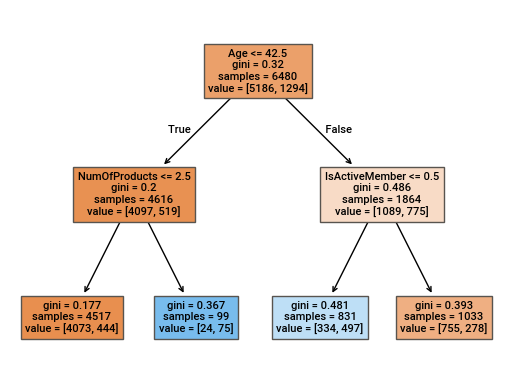

In [29]:
plot_tree(dt, feature_names = X_train.columns, filled = True);

In [36]:
## how are predictions made
## TERMINAL NODES
X_test.iloc[0]
## value = [4073, 444]  the most common class is DID NOT CHURN
## predict that person will NOT churn
dt.predict(X_test)[0]

0

In [48]:
## the predict proba
## proportion of the class of interest (second column)
## prob_0, prob_1
dt.predict_proba(X_test)[:,1][0] ## probability of churn for obs 0  --- 444/4517

0.09829532875802524

In [44]:
X_test.iloc[11]
## age: 36
## NumofProducts: 2
dt.predict(X_test)[11]

0

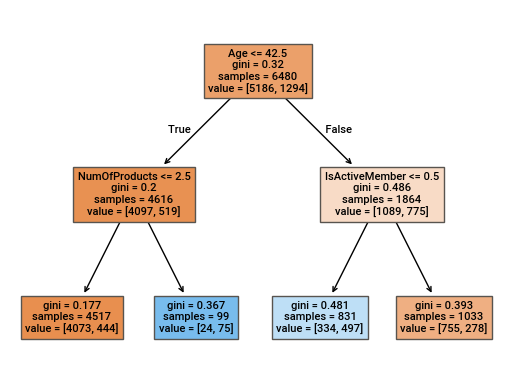

In [50]:
plot_tree(dt, feature_names = X_train.columns, filled = True);

In [51]:
## quiz question
## age: 33
## Number of Products: 5
## Is an active ONLINE member =  1
## what is the prediction? Non-Churn or Churn
## CHURN
## 24 0s and 75 1s

## What is the probability of CHURN?
75/99

0.7575757575757576

In [53]:
## 124000   non-frauds
## 342      frauds
## gini root node
n = 124000 + 342
p1 = 342/n
p2 = 124000/n
gini = 2*(p1*p2)
gini

0.005485826773681107

In [54]:
## for very imbalanced data
## GINI improvement will be hard
## PREDICTION and PROPENSITIES will be more difficult for the class of interest

In [55]:
## create a decision tree with max_depth = 2
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

## instance
dt = DecisionTreeClassifier(max_depth = 2)

## fit on THE UNDERSAMPLED or OVERSAMPLED
dt.fit(X_train_US, y_train_US)

DecisionTreeClassifier(max_depth=2)

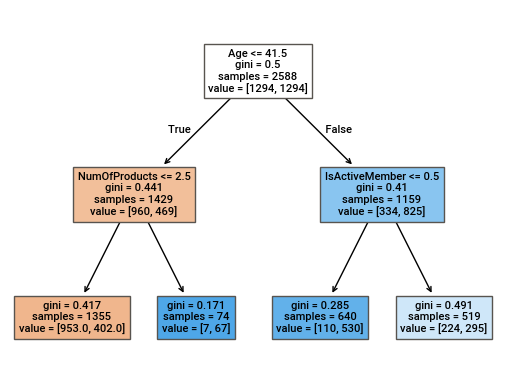

In [56]:
plot_tree(dt, feature_names = X_train.columns, filled = True);

In [57]:
## ENTROPY
## impurity metric
## a little better than GINI
## if there is IMBALANCE (not so bad) - ENTROPY is better  than GINI
## takes long to compute. GINI is 2*p1*p2. ENTROPY p1*log2(p1) + p2*log2(p2)

In [58]:
## instance
dt_entropy = DecisionTreeClassifier(max_depth = 1, criterion = 'entropy')

## fit on original
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

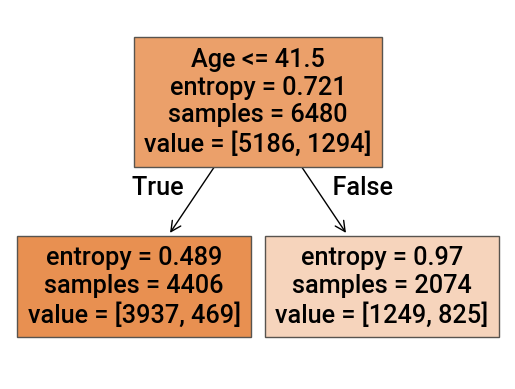

In [59]:
##  plot the tree
plot_tree(dt_entropy, feature_names = X_train.columns, filled = True);

In [63]:
## what is the entropy on the ROOT node?
p1  = 5186/6480
p2  = 1294/6480
entropy = -(p1*np.log2(p1) + p2*np.log2(p2))
entropy

0.7213103812992262

In [64]:
## calculate the entropy on the right node
## calculate the entropy on the left node
## calculate the combined entropy
## the improvement